# Dataset Analysis Project

## Introduction

Our data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue

* `tmdb-movies.csv`

We are going through multiple analysis and show some visualizations

* The most popular genres for each year
* The overall popular genre
* Top 10 movies with the highest revenue
* The properties of the most profitable movies

In [34]:

import numpy as np
import pandas as pd


In [35]:
tmdb = pd.read_csv("tmdb-movies.csv")

In [36]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
tmdb.duplicated().value_counts()

False    10865
True         1
dtype: int64

* Checking for duplicate values as we can see `TEKKEN` is duplicated and we should remove it.

In [38]:
tmdb[tmdb.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [39]:
tmdb.drop_duplicates(keep='first',inplace=True)
tmdb.iloc[[2089,2090],:]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,...,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


* as we can see there is no more duplicates

In [40]:
tmdb.duplicated().value_counts()

False    10865
dtype: int64

In [41]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [42]:
tmdb["keywords"].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

the `id` column must be object Data Type

In [43]:
tmdb=tmdb.astype({"id":object})
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  object 
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

`release date` must be `datatime` data type not `object`

In [44]:
tmdb["release_date"] = pd.to_datetime(tmdb["release_date"])

In [45]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

***

* as we can see 0 is inconsistent value for `budget`,`revenue` or `profit` tried to use [TMDB API](https://github.com/celiao/tmdbsimple) but found that some `id`s are wrong tried to fix the ids by searching the `original_title` then obtaining the right id but found some titles not bery correctly accurate so really it's very hopeless to clean such dirty data but we will replace 0 with `NaN` so it doesn't affect other analysis.

In [46]:
tmdb.iloc[:,[3,4]]=tmdb.iloc[:,[3,4]].replace(to_replace=0,value=np.nan)
tmdb.iloc[:,[3,4]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   5169 non-null   float64
 1   revenue  4849 non-null   float64
dtypes: float64(2)
memory usage: 254.6 KB


In [47]:
tmdb.insert(loc=5,column='profit',value=tmdb['revenue']-tmdb['budget'])
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                5169 non-null   float64       
 4   revenue               4849 non-null   float64       
 5   profit                3854 non-null   float64       
 6   original_title        10865 non-null  object        
 7   cast                  10789 non-null  object        
 8   homepage              2936 non-null   object        
 9   director              10821 non-null  object        
 10  tagline               8041 non-null   object        
 11  keywords              9372 non-null   object        
 12  overview              10861 non-null  object        
 13  runtime         

***

###  The most popular genres for each year

In [48]:
tmdb.loc[:,["release_year"]].value_counts().size

56

In [49]:
years=np.sort(tmdb["release_year"].unique())
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [50]:
tmdb[tmdb["release_year"] == 2015]["genres"].mode()

0    Drama
dtype: object

In [51]:
print("The Most Popular genres for each year are as follows:")
popular_genre_year = pd.DataFrame(columns=["year","Genre"])
for x in years:
    most_popular_genre = tmdb[tmdb["release_year"] == x]["genres"].mode()
    popular_genre_year = popular_genre_year.append({'year':x,'Genre':most_popular_genre[0]},ignore_index=True)
    print("{} : {}".format(x,most_popular_genre[0]))

The Most Popular genres for each year are as follows:
1960 : Horror
1961 : Drama
1962 : Drama
1963 : Horror
1964 : Comedy|Romance
1965 : Action|Adventure|Drama|Western
1966 : Action|Western
1967 : Comedy|Drama|Romance
1968 : Drama
1969 : Drama
1970 : Horror
1971 : Drama
1972 : Comedy
1973 : Crime|Drama
1974 : Comedy|Science Fiction
1975 : Comedy
1976 : Horror|Thriller
1977 : Horror|Science Fiction
1978 : Horror
1979 : Comedy
1980 : Action|Comedy
1981 : Comedy
1982 : Comedy
1983 : Comedy
1984 : Comedy
1985 : Drama
1986 : Comedy
1987 : Comedy
1988 : Drama
1989 : Comedy
1990 : Comedy|Drama
1991 : Comedy
1992 : Drama
1993 : Comedy
1994 : Comedy
1995 : Comedy
1996 : Comedy
1997 : Comedy
1998 : Comedy|Drama
1999 : Comedy
2000 : Comedy
2001 : Comedy
2002 : Comedy|Drama
2003 : Comedy
2004 : Comedy
2005 : Drama
2006 : Drama
2007 : Comedy
2008 : Drama
2009 : Comedy
2010 : Drama
2011 : Drama
2012 : Drama
2013 : Drama
2014 : Drama
2015 : Drama


* the code above shows the most popular genre for each year.

***
### The overall popular genre

In [52]:
popular_genre_year

,year,Genre
0,1960,Horror
1,1961,Drama
2,1962,Drama
3,1963,Horror
4,1964,Comedy|Romance
5,1965,Action|Adventure|Drama|Western
6,1966,Action|Western
7,1967,Comedy|Drama|Romance
8,1968,Drama
9,1969,Drama


In [53]:
popular_genre_year['Genre'].mode()

0    Comedy
dtype: object

* as we can see from our analysis Comdey movies are the most popular overall.

***

## Top 10 movies with the highest revenue

In [54]:
t = tmdb.sort_values(by="revenue",ascending=False).head(10)
t

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,2.544506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,1.645034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000.0,1.519558e+09,1.299558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,1.125036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,tt1201607,5.711315,125000000.0,1.327818e+09,1.202818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,tt2294629,6.112766,150000000.0,1.274219e+09,1.124219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,tt1300854,4.946136,200000000.0,1.215440e+09,1.015440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09


In [55]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Text(0, 0.5, 'revenue')

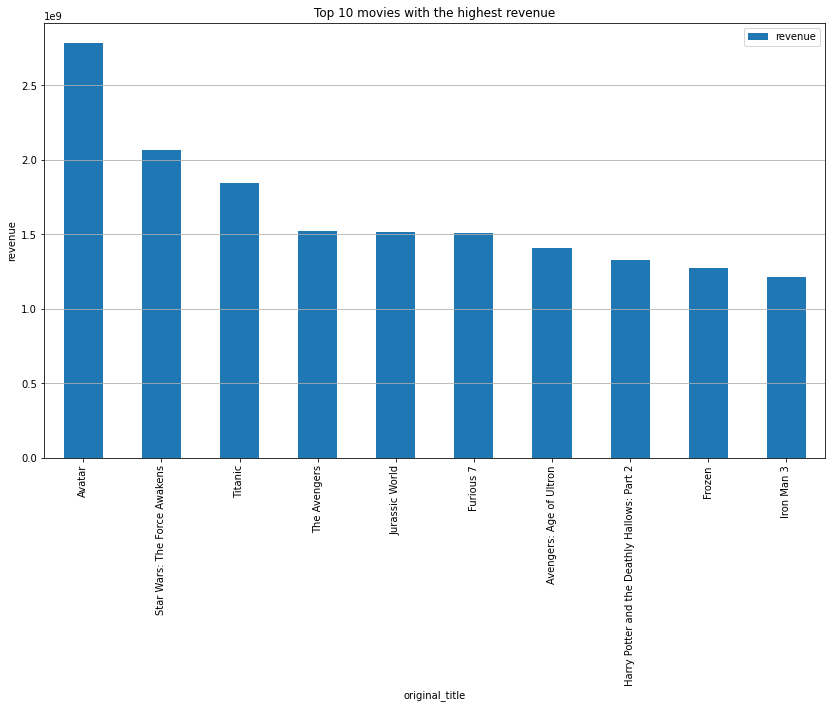

In [56]:
t.plot.bar(x="original_title",y="revenue",figsize=(14,8))
plt.title("Top 10 movies with the highest revenue")
plt.grid(axis='y')
plt.ylabel("revenue")

***
### The TotuniqueBudgets of all the movies for each year

<AxesSubplot:title={'center':'Budget vs Year'}, xlabel='release_year', ylabel='budget'>

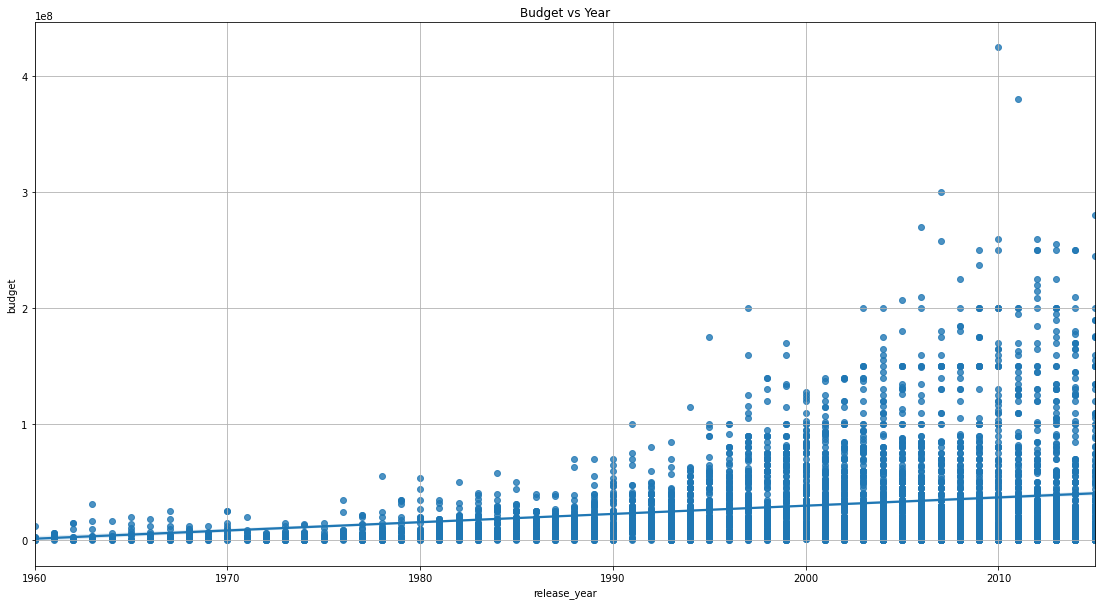

In [57]:
plt.figure(figsize=(19,10))
plt.grid(axis='both')
plt.title("Budget vs Year")
plt.ylabel("Total Budget Spent on producing movies")
sb.regplot(x=tmdb['release_year'],y=tmdb['budget'],scatter=True)

* as we can see as the year progressed the budget on producing movies has increased.

***

## The properties of the most profitable movies

In [58]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                5169 non-null   float64       
 4   revenue               4849 non-null   float64       
 5   profit                3854 non-null   float64       
 6   original_title        10865 non-null  object        
 7   cast                  10789 non-null  object        
 8   homepage              2936 non-null   object        
 9   director              10821 non-null  object        
 10  tagline               8041 non-null   object        
 11  keywords              9372 non-null   object        
 12  overview              10861 non-null  object        
 13  runtime         

<AxesSubplot:title={'center':'Profit vs Budget'}, xlabel='profit', ylabel='budget'>

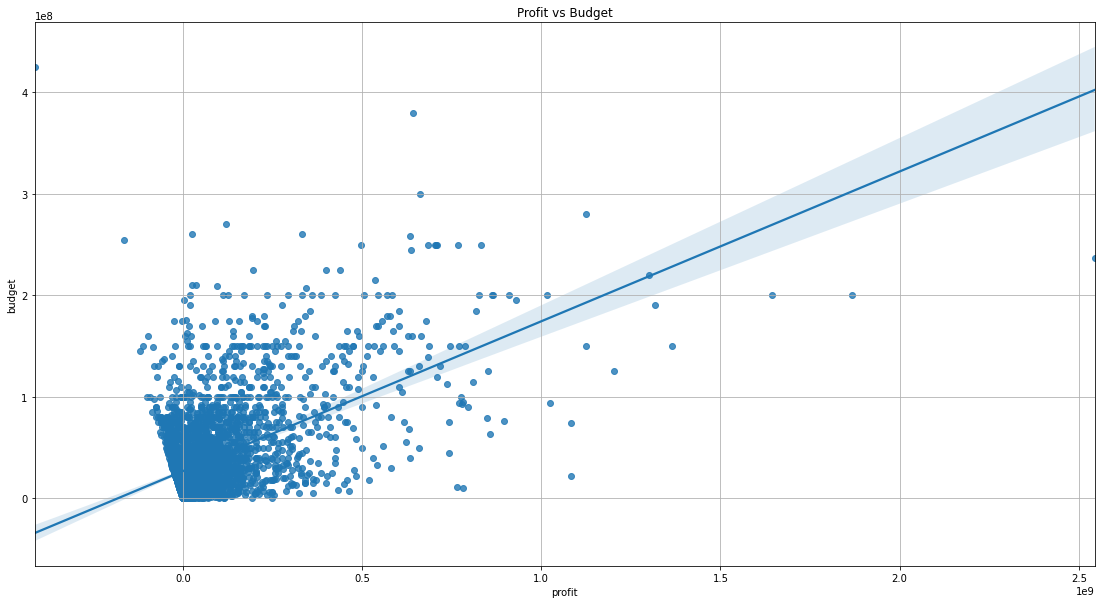

In [63]:
plt.figure(figsize=(19,10))
plt.grid(axis='both')
plt.title("Profit vs Budget")
plt.ylabel("Budget")
plt.xlabel("profit")
sb.regplot(x=tmdb['profit'],y=tmdb['budget'])

* not so much we can obtain from this graph except for the strong direct propotion relationship between the profits and the budgets $profit \propto budget$

* the most profitable movies (1:1.5 Billion) seems to cost on average between (10 to 20 Millions) also the in that range we can notice that the least no of the movies that couldn't profit lie in that range.

* movies with the highest budgets didn't generate the highest profits.

<AxesSubplot:title={'center':'Profit vs Popularity'}, xlabel='profit', ylabel='popularity'>

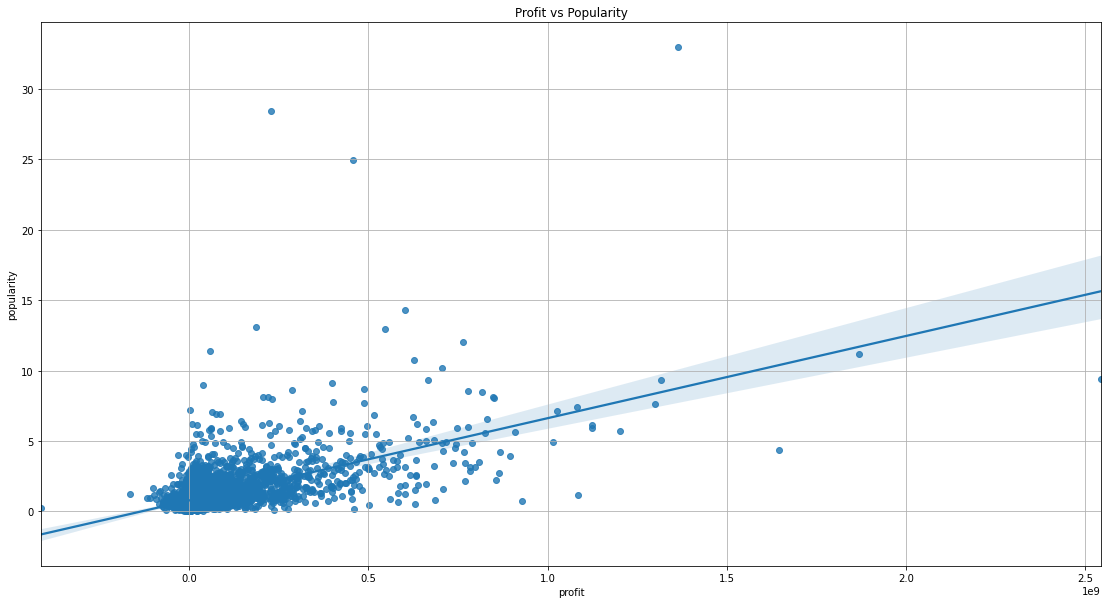

In [84]:
plt.figure(figsize=(19,10))
plt.grid(axis='both')
plt.title("Profit vs Popularity")
plt.ylabel("Popularity")
plt.xlabel("Profit")
sb.regplot(x=tmdb['profit'],y=tmdb['popularity'])

* the most popular movies that rated above 10 aren't the most profitable ones.

* the most profitable movies (above 1 billion in profits) scored above 5 points in popularity

* nearly all the movies that didn't generate profits scored less than 5 points in popularity

<AxesSubplot:title={'center':'Profit vs Runtime'}, xlabel='profit', ylabel='runtime'>

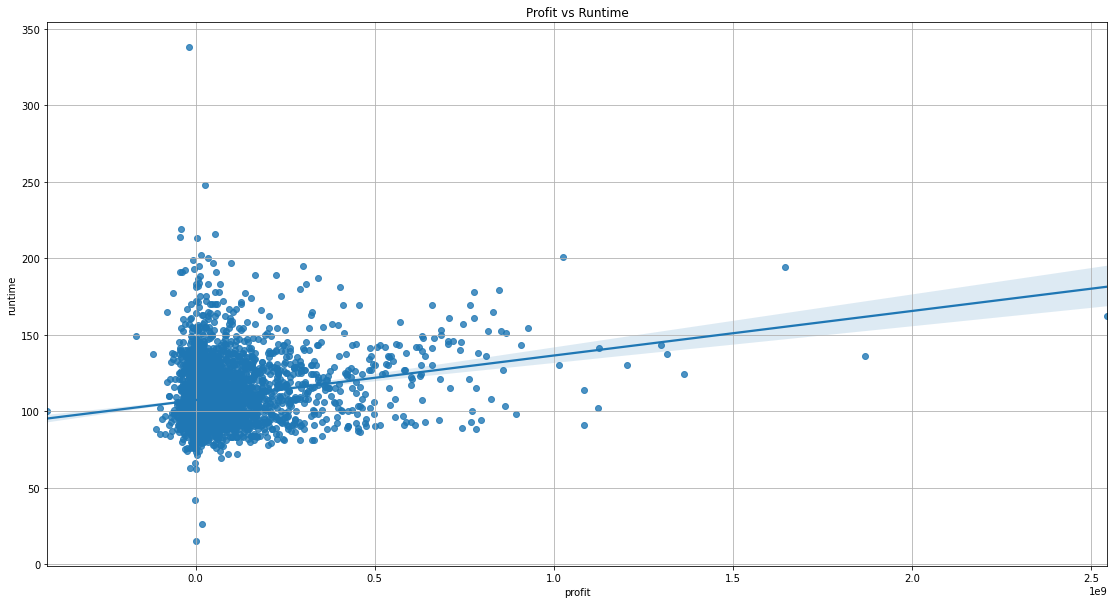

In [85]:
plt.figure(figsize=(19,10))
plt.grid(axis='both')
plt.title("Profit vs Runtime")
plt.ylabel("Runtim")
plt.xlabel("Profit")
sb.regplot(x=tmdb['profit'],y=tmdb['runtime'])

* the runtime for the most profitable movies was between (100 to 150) minutes.

<AxesSubplot:title={'center':'Profit vs Month Release'}, xlabel='Profit', ylabel='Month Release'>

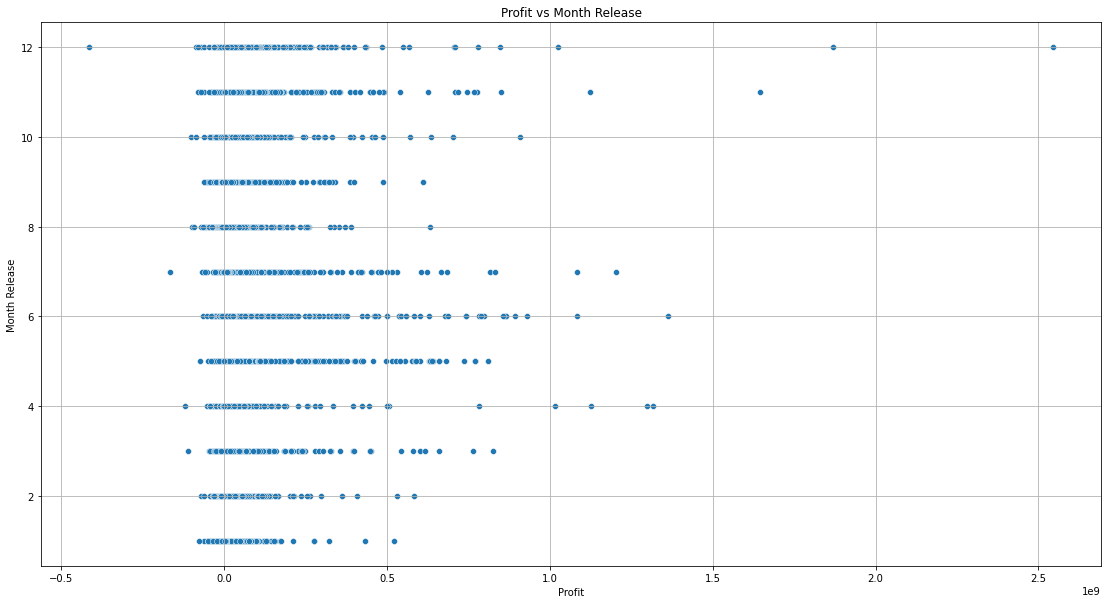

In [90]:
plt.figure(figsize=(19,10))
plt.grid(axis='both')
plt.title("Profit vs Month Release")
plt.ylabel("Month Release")
plt.xlabel("Profit")
sb.scatterplot(x=tmdb['profit'],y=tmdb['release_date'].dt.month)

* the most profitable movies were released between in April and Agust

***

In [112]:
director = pd.DataFrame(columns=['id','director','Movie_profit'])
index = tmdb['director'].dropna().index
for x in index:
    text = tmdb.loc[x,'director'].split('|')
    for y in text:
        director = director.append({'id':tmdb.loc[x,'id'],'director':y,'Movie_profit':tmdb.loc[x,'profit']},ignore_index=True)
    print(end='.',flush=True)    

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [115]:
global tmdb

In [125]:
def split(name):
    df = pd.DataFrame(columns=['id',name,'Movie_profit'])
    index = tmdb.loc[:,[name,'profit']].dropna().index
    for x in index:
        text = tmdb.loc[x,name].split('|')
        for y in text:
            df = df.append({'id':tmdb.loc[x,'id'],name:y,'Movie_profit':tmdb.loc[x,'profit']},ignore_index=True)
        print(end='.',flush=True)
    df.to_csv(name,index=False)
    return df

In [126]:
director = split('director')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [124]:
director

,id,director,Movie_profit
0,135397,Colin Trevorrow,1.363529e+09
1,76341,George Miller,2.284364e+08
2,262500,Robert Schwentke,1.852382e+08
3,140607,J.J. Abrams,1.868178e+09
4,168259,James Wan,1.316249e+09
...,...,...,...
4159,396,Mike Nichols,2.623669e+07
4160,5780,Alfred Hitchcock,1.000000e+07
4161,6644,Howard Hawks,1.347000e+06
4162,5923,Robert Wise,8.000000e+06


In [114]:
director.to_csv("director")